## Machine Learning Assignment 3
#### Section 1 Ji Hyun Kim

**Data**: Melbourne_housing.csv (Attached in files)

**Note**: Please use `df = df.loc[:, ~df.columns.str.contains('^Unnamed')]` to remove any Unnamed columns from dataset.
**Hint**:
- Don’t worry if you get negative score for test data in linear regression, think about overfitting.
- In Lasso, you can use parameters to fine tune your model, alpha = 0 will be same as linear model so try different values of alpha to fit the best fit.

In [122]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder


In [123]:
# Import the dataset
df = pd.read_csv("Melbourne_housing.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

Price, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Lattitude, Longtitude have missing values. These wil be addressed in question 2.

##### **1. Data Exploration and Visualization** (15 pts):
- Explore the Melbourne house dataset.

- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

- Include any other plots you find interesting and provide brief interpretations.

In [124]:
# Check the first few rows of the dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


Plot a histogram of "price" to examine the distribution of house price

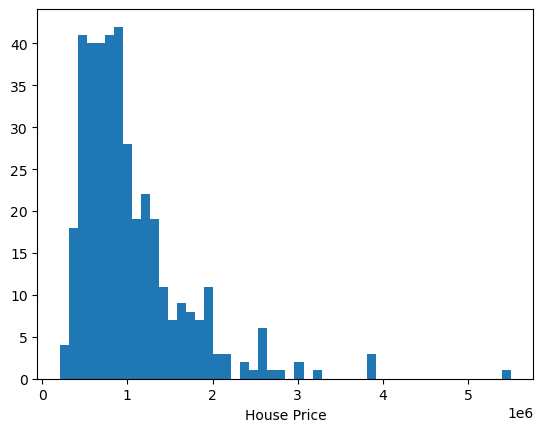

In [125]:
plt.hist(df["Price"], bins=50)
plt.xlabel('House Price')
plt.show()

The histogram displays a right-skewed distribution, indicating that a majority of the houses fall within the price range of 50,000 to 1,000,000 Australian dollars.

Create a bar plots to see average house prices based on the number of rooms,property type, the number of bedrooms, the number of bathrooms, council area and region

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_30860/630888811.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_roomnum = df.groupby(df['Rooms']).mean()['Price']
posx and posy should be finite values
posx and posy should be finite values


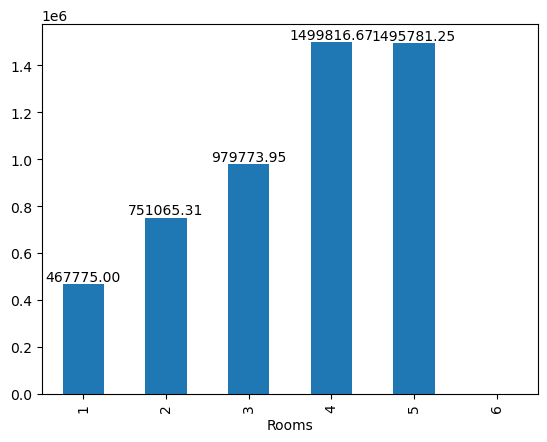

In [126]:
# Compute the average house prices based on the number of rooms.
mean_price_roomnum = df.groupby(df['Rooms']).mean()['Price']

# plot a bar plot
mean_price_roomnum.plot.bar()
for i, v in enumerate(mean_price_roomnum):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

The chart suggests that as the number of rooms in a house increases from 1 to 4, there is a trend of increasing average house prices.There is a slight decrease in the average price when moving from a 4-room to a 5-room house, but it's not substantial.

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_30860/690883269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_type= df.groupby(df['Type']).mean()['Price']


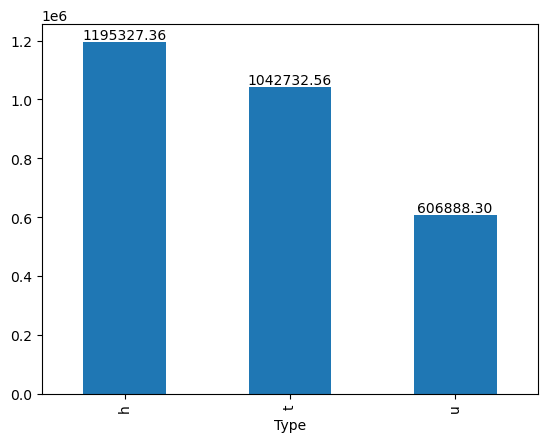

In [127]:
# Compute the average house prices based on the type of the property.
mean_price_type= df.groupby(df['Type']).mean()['Price']

# plot a bar plot
mean_price_type.plot.bar()
for i, v in enumerate(mean_price_type):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

There is no data for listings of bedrooms in the dataset. Houses are on average the most expensive, followed by townhouses, with units in duplexes being the least expensive of the three. 

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_30860/2049019476.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_bedrooms= df.groupby(df['Bedroom2']).mean()['Price']
posx and posy should be finite values
posx and posy should be finite values


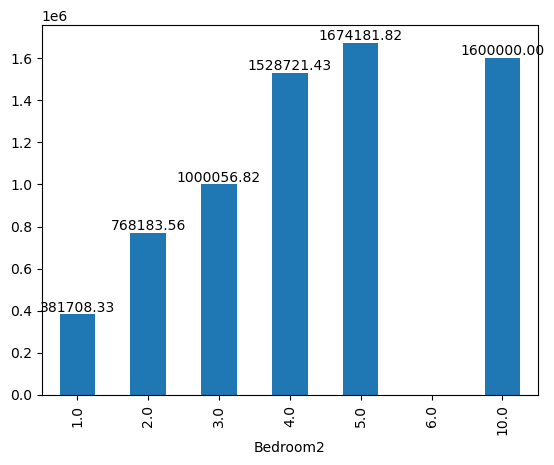

In [128]:
# Compute the average house prices based on the number of bedrooms.
mean_price_bedrooms= df.groupby(df['Bedroom2']).mean()['Price']

# plot a bar plot
mean_price_bedrooms.plot.bar()
for i, v in enumerate(mean_price_bedrooms):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

The chart shows a general trend where the average property price increases as the number of bedrooms increases from 1 to 5. There is a slight decrease in the average price for properties with 10 bedrooms compared to those with 5 bedrooms. This could be an anomaly or due to other factos such as location.

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_30860/3568068463.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_bathrooms= df.groupby(df['Bathroom']).mean()['Price']


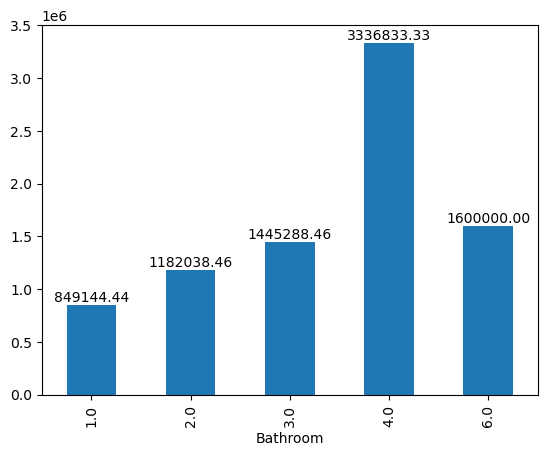

In [129]:
# Compute the average house prices based on the number of bathrooms.
mean_price_bathrooms= df.groupby(df['Bathroom']).mean()['Price']

# plot a bar plot
mean_price_bathrooms.plot.bar()
for i, v in enumerate(mean_price_bathrooms):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

The plot suggests that there is a general increase in average property prices as the number of bathrooms increases from 1 to 4. However, there is an unexpected price decrease for properties with 6 bathrooms, like the case of bedrooms, this could be due to outliers or other factors such as location of the property.

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_30860/3990330307.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_area = df.groupby(df['CouncilArea']).mean()['Price']


posx and posy should be finite values
posx and posy should be finite values


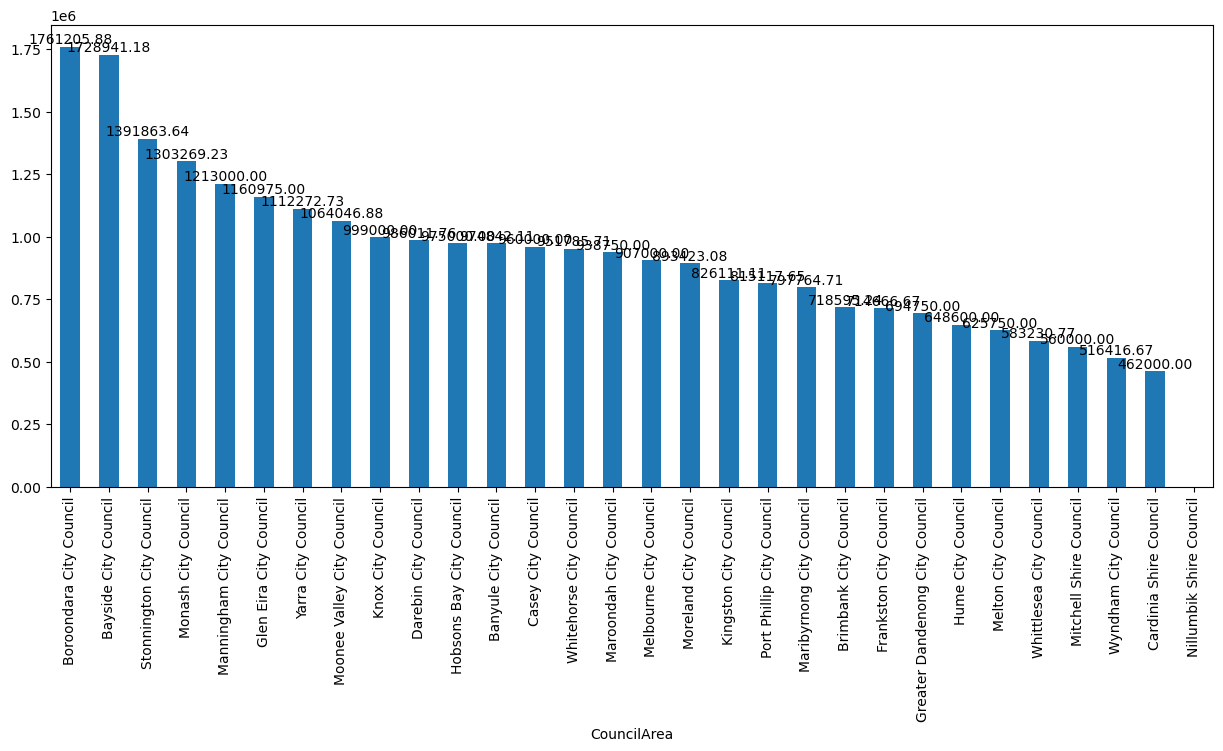

In [130]:
# Compute the average house prices based on the council area.
mean_price_area = df.groupby(df['CouncilArea']).mean()['Price']

# Sort values in decending order to plot a bar plot
mean_price_area_sorted = mean_price_area.sort_values(ascending=False)

plt.figure(figsize=(15,6))

# plot a bar plot
mean_price_area_sorted.plot.bar()
for i, v in enumerate(mean_price_area_sorted):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

The chart provides a clear comparison of average house prices across different council areas, indicating significant variation in property values based on location. 

For example, Boroondara City Council and Bayside City Council have the highest average house prices, each exceeding 1.7M Australian dollars, which is about 300K dollars more than that of Stonnington City Council, which holds the third place.

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_30860/2294539912.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_region = df.groupby(df['Regionname']).mean()['Price']


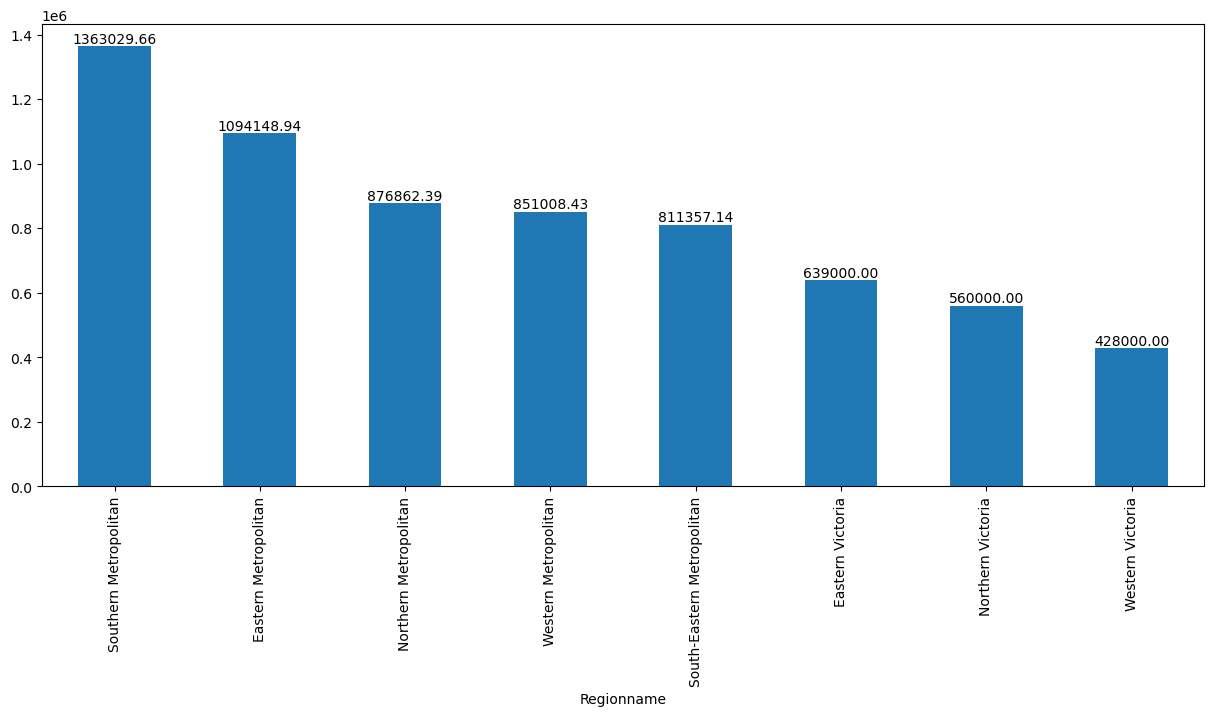

In [131]:
# Compute the average house prices based on the region.
mean_price_region = df.groupby(df['Regionname']).mean()['Price']

# Sort values in decending order to plot a bar plot
mean_price_region_sorted = mean_price_region.sort_values(ascending=False)

plt.figure(figsize=(15,6))

# plot a bar plot
mean_price_region_sorted.plot.bar()
for i, v in enumerate(mean_price_region_sorted):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

The chart indicates a clear gradient in average house prices, with the metropolitan areas generally having higher prices than the Victoria regions. Among the metropolitan areas, the Southern and Eastern regions have the highest average prices (>1M dollars), while the Northern and Western regions have lower averages. The non-metropolitan regions, classified as parts of Victoria, show a further decrease in average house prices, with Western Victoria being the most affordable on average. 

Now plot scatterplots to investigate any relationship between Price with Landsize, BuildingArea, YearBuilt.

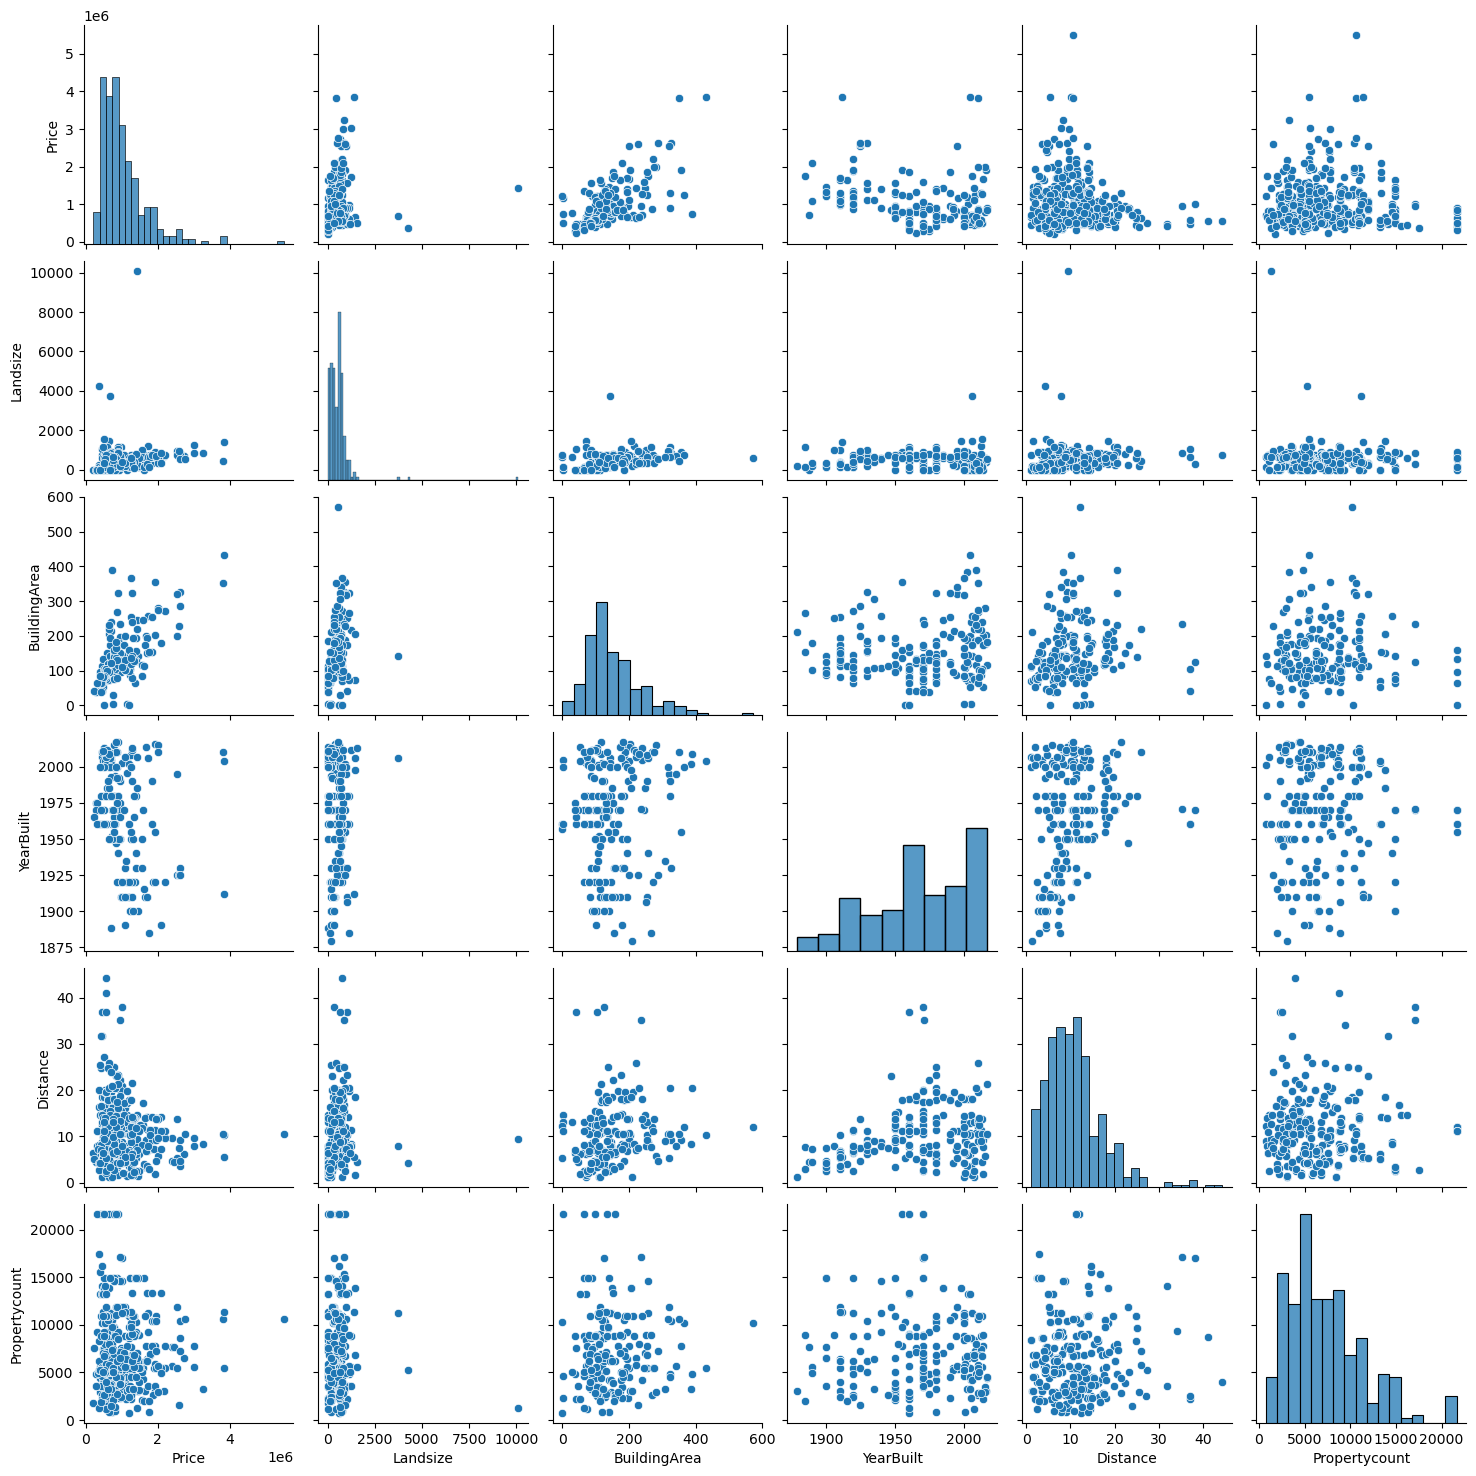

In [132]:
features = ['Price', 'Landsize', 'BuildingArea', 'YearBuilt', 'Distance', 'Propertycount']
sns.pairplot(df, vars=features)

- Price vs. Landsize : There is not a strong linear relationship between land size and price, with a wide spread of prices for similar land sizes.
- Price vs. Building Area : There seems to be a slight trend where larger building areas can have higher prices.
- Price vs. YearBuilt : There doesn't seem to be a clear trend linking the year built to the property price.
- Price vs. Distance : No clear linear relationship detected
- Price vs. Peopertycount : No clear linear relationship detected

##### **2. Linear Regression Model Development** (15 pts):
- Develop a Linear regression model to predict price of house in Melbourne.

- Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).

- Explain the steps you took in preparing the data and developing the model.

- You might need to encode the values for your prediction.

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [134]:
# Select dependent variables and features
df2 = df.iloc[:,[4,2,3,8,10,11,12,13,14,15,16,19,20]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          391 non-null    float64
 1   Rooms          499 non-null    int64  
 2   Type           499 non-null    object 
 3   Distance       499 non-null    float64
 4   Bedroom2       371 non-null    float64
 5   Bathroom       371 non-null    float64
 6   Car            362 non-null    float64
 7   Landsize       325 non-null    float64
 8   BuildingArea   189 non-null    float64
 9   YearBuilt      212 non-null    float64
 10  CouncilArea    499 non-null    object 
 11  Regionname     499 non-null    object 
 12  Propertycount  499 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.8+ KB


In [135]:
# Handle missing values

# 1. Drop all rows where Price is null
df2=df2.dropna(subset=['Price'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 497
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          391 non-null    float64
 1   Rooms          391 non-null    int64  
 2   Type           391 non-null    object 
 3   Distance       391 non-null    float64
 4   Bedroom2       299 non-null    float64
 5   Bathroom       299 non-null    float64
 6   Car            292 non-null    float64
 7   Landsize       267 non-null    float64
 8   BuildingArea   158 non-null    float64
 9   YearBuilt      178 non-null    float64
 10  CouncilArea    391 non-null    object 
 11  Regionname     391 non-null    object 
 12  Propertycount  391 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 42.8+ KB


In [136]:
# 2. Substitute with '0' for null values in Bedroom2, Bathroom, Car
df2[['Bedroom2','Bathroom','Car']]=df2[['Bedroom2','Bathroom','Car']].fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 497
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          391 non-null    float64
 1   Rooms          391 non-null    int64  
 2   Type           391 non-null    object 
 3   Distance       391 non-null    float64
 4   Bedroom2       391 non-null    float64
 5   Bathroom       391 non-null    float64
 6   Car            391 non-null    float64
 7   Landsize       267 non-null    float64
 8   BuildingArea   158 non-null    float64
 9   YearBuilt      178 non-null    float64
 10  CouncilArea    391 non-null    object 
 11  Regionname     391 non-null    object 
 12  Propertycount  391 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 42.8+ KB


In [137]:
# 2. Substitute with average for null values in Landsize, BuildingArea, YearBuilt
df2['Landsize']=df2['Landsize'].fillna(df.Landsize.mean())
df2['BuildingArea']=df2['BuildingArea'].fillna(df.BuildingArea.mean())
df2['YearBuilt']=df2['YearBuilt'].fillna(df.YearBuilt.mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 497
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          391 non-null    float64
 1   Rooms          391 non-null    int64  
 2   Type           391 non-null    object 
 3   Distance       391 non-null    float64
 4   Bedroom2       391 non-null    float64
 5   Bathroom       391 non-null    float64
 6   Car            391 non-null    float64
 7   Landsize       391 non-null    float64
 8   BuildingArea   391 non-null    float64
 9   YearBuilt      391 non-null    float64
 10  CouncilArea    391 non-null    object 
 11  Regionname     391 non-null    object 
 12  Propertycount  391 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 42.8+ KB


In [138]:
# Check the first few rows of the new dataset
df2.head()

,Price,Rooms,Type,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,438000.0,2,u,6.5,2.0,1.0,1.0,0.0,66.000000,1970.000000,Darebin City Council,Northern Metropolitan,8870
1,901000.0,2,h,7.8,2.0,1.0,1.0,545.0,107.000000,1940.000000,Darebin City Council,Northern Metropolitan,11204
2,800000.0,3,u,13.9,3.0,2.0,2.0,261.0,152.461905,1968.117925,Glen Eira City Council,Southern Metropolitan,10969
3,1155000.0,3,t,12.4,0.0,0.0,0.0,533.4,152.461905,1968.117925,Manningham City Council,Eastern Metropolitan,5420
4,1630000.0,3,u,3.3,3.0,1.0,1.0,0.0,152.461905,1968.117925,Melbourne City Council,Southern Metropolitan,14887


In [139]:
# One hot encoding for the categoricla features
df2 = pd.get_dummies(df2,drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 497
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Price                                       391 non-null    float64
 1   Rooms                                       391 non-null    int64  
 2   Distance                                    391 non-null    float64
 3   Bedroom2                                    391 non-null    float64
 4   Bathroom                                    391 non-null    float64
 5   Car                                         391 non-null    float64
 6   Landsize                                    391 non-null    float64
 7   BuildingArea                                391 non-null    float64
 8   YearBuilt                                   391 non-null    float64
 9   Propertycount                               391 non-null    int64  
 10  Type_t        

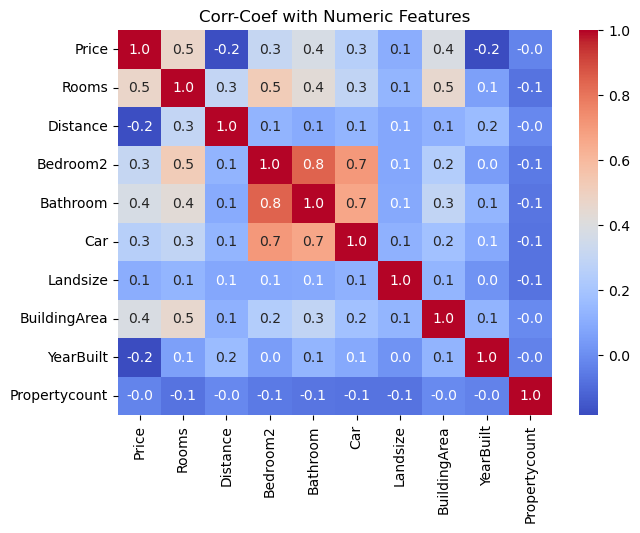

In [140]:
# Before creating model, check the correlation coefficients among numeric features to avoid multicollinearity and drop some features if needed

corr_coef = df2.iloc[:,[0,1,2,3,4,5,6,7,8,9]].corr() # create a correlation-coefficient matrix

# Plot a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_coef, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Corr-Coef with Numeric Features")
plt.show()

None of these correlation coefficients are extremely high(>0.9). Hence I'll keep all features.

In [141]:
# Prepare the data 
X = df2.drop('Price', axis=1)
y = df2['Price']

# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
# Create regression model with sklearn
model1 = LinearRegression().fit(X_train, y_train)
model1

LinearRegression()

In [143]:
# Predict y based on the X test 
y_pred = model1.predict(X_test)

##### **3. Model Evaluation** (20 pts):
- Evaluate your linear regression model using appropriate metrics.

- Split the dataset into training and testing sets to perform this evaluation.

- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [144]:
# Calculate OOS R^2, MSE, and RMSE to evaluate the model trained
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2:", round(r2,4))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))

R^2: 0.5392
MSE: 336055080013.9
RMSE: 579702.58


- An R^2 value of 0.5392 means that approximately 53.92% of the variance in the dependent variable, house price can be explained by the features in the model. While this isn't necessarily bad, it does suggest that there is still a significant portion of the variance (almost half) that the model does not account for. Also, since this is the only model trained, whether this R^2 is considered good or bad depends on the benchmark for similar predictive models.

- The MSE and RMSE are significantly high, indicating that the model introduces a large error in predicting house prices. For instance, with an RMSE of 579702.58, the model's predictions deviate from the actual prices by an average of over half a million dollars.

- Generally, the model not seems to be performing well. However, assessing whether these metrics indicate a good or bad performance depends on the context including other similar models' metrics.

##### **4. Regularization** (25 pts):
- Is there a need for Lasso regularization? Explain. (Compare test and training results)

- Set up a Lasso regression model with specified parameters and fit it to the training data.

- Perform Lasso regression on both training and test data

- Analyze and explain how the results change from previous answer.

**Is there a need for Lasso regularization?:** When comparing R^2 between the training and test sets, it is evident that the model fitted much better on the training set. This discrepancy is a clear sign of overfitting, meaning that the model is overly tuned to the training data. In this scenario, employing Lasso regularization could be beneficial to address the overfitting problem. Lasso regularization reduces the coefficients of less significant features to zero, thus assisting identifying significant features for the model. This approach can lead to a simpler model that generalizes better to new data.

In [145]:
# Compare the test and training results with R2 score
score_train = model1.score(X_train, y_train)
score_test = model1.score(X_test, y_test)

print("R^2 in train set:", round(score_train,4))
print("R^2 in test set:", round(score_test,4))

R^2 in train set: 0.7306
R^2 in test set: 0.5392


In [146]:
# import additional libraries for performing Lasso regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [147]:
# Lasso and Ridge are sensitive to scale so scale all of the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
# Find the best alpha parameter through K-fold CV
alphas = np.logspace(-6, 6, 10)
k = 5
n = len(y_train)

# Shuffle the data
indices = np.arange(n)
np.random.shuffle(indices)

X_cv = X_train_scaled[indices]
y_cv = y_train.iloc[indices]

avg_rmse=[]
for alpha in alphas:
    rmse_list = []
    
    # Manual k-fold splitting
    for fold in range(k):
        # Calculate the size of each fold
        fold_size = n // k
        
        # Define the start and end indices of the test set
        start, end = fold * fold_size, (fold + 1) * fold_size
        
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        
        X_train2, X_test2 = X_cv[train_indices], X_cv[test_indices]
        y_train2, y_test2 = y_cv.iloc[train_indices], y_cv.iloc[test_indices]
        
        lasso2 = Lasso(alpha=alpha)
        
        lasso2.fit(X_train2, y_train2)
        
        y_pred2 = lasso2.predict(X_test2)
        rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
        
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))

# Find the best alpha
best_alpha = alphas[np.argmin(avg_rmse)]
print(f"Best alpha: {best_alpha}")

/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.813e+11, tolerance: 8.360e+09
  model = cd_fast.enet_coordinate_descent(
/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+11, tolerance: 7.788e+09
  model = cd_fast.enet_coordinate_descent(
/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Best alpha: 2154.434690031878


In [149]:
# Fit the Lasso regression model
lasso = Lasso(alpha=best_alpha, max_iter=100000, tol = 0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=2154.434690031878, max_iter=100000, tol=0.1)

In [150]:
# Compare the test and training results with R2 score gained from Lasso model
lasso_score_train = lasso.score(X_train_scaled, y_train)
lasso_score_test = lasso.score(X_test_scaled, y_test)

print("R^2 in train set:", round(lasso_score_train,4))
print("R^2 in test set:", round(lasso_score_test,4))

R^2 in train set: 0.7216
R^2 in test set: 0.5258


- R^2 in train set:  0.7306 → 0.7216 (LASSO)
- R^2 in test set: 0.5392 → 0.5258 (LASSO)

After applying Lasso, the R^2 values are 0.7216 (train set) and 0.5258 (test set), respectively. The gap between training and testing performance has subtly decreased, indicating that Lasso might have reduced overfitting by eliminating irrelevant features. 

However, while overfitting was reduced, we observed slight overall decrease in model performance (lower R-squared values in both training and testing sets). This could mean that the regularization effect of Lasso is too strong, potentially leading to underfitting.

##### **5. Out-of-sample performance** (25 pts):
- Ignore all previously trained models.

- Split the data into a new training and test 80-20.

- Newly train (fit) the linear regression model on the training data.

- Newly train (fit) the lasso regression model on the training data.

- Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

- Estimate the models true OOS performance by computing their deviance on the test data.

- Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.

In [151]:
# Prepare the data 
X2 = df2.drop('Price', axis=1)
y2 = df2['Price']

# Split dataset into train set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [152]:
# Newly fit the linear regression model on the training data
model2 = LinearRegression().fit(X_train2, y_train2)
model2

LinearRegression()

In [153]:
# Newly fit the lasso regression model on the training data.

# Normalize the dataset
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Find the best alpha parameter for Lasso model
lasso_cv = LassoCV(alphas=None, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled2, y_train) # Fit the model
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {lasso_cv.alpha_}") # Best alpha

Best alpha: 8686.69337397879


In [154]:
# Fit the Lasso regression model
lasso2 = Lasso(alpha=best_alpha)
lasso2.fit(X_train_scaled2, y_train2)

Lasso(alpha=8686.69337397879)

Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

In [155]:
# Define functions to calculate AIC, AICc, and BIC
def aic(n,rss,k):
    aic = n*np.log(rss/n)+2*k # For linear regression
    return aic 

def aicc(n,rss,k):
    aic = n*np.log(rss/n)+2*k
    aicc = aic + (2*k*(k+1)) / (n-k-1) # For linear regression
    return aicc

def bic(n,rss,k):
    bic = n*np.log(rss/n)+k*np.log(n) # For linear regression
    return bic 

# Linear regression model
n_lm_in = len(y_train2) # number of observations
rss_lm_in = np.sum((y_train2 - model2.predict(X_train2))**2) # Residual Sum of Squares(RSS)
k_lm_in = len(model2.coef_) # number of parameters

aic_lm_in = aic(n_lm_in,rss_lm_in,k_lm_in)
aicc_lm_in = aicc(n_lm_in,rss_lm_in,k_lm_in)
bic_lm_in = bic(n_lm_in,rss_lm_in,k_lm_in)

# Lasso linear regression model
n_la_in = len(y_train2)
rss_la_in = np.sum((y_train2 - lasso2.predict(X_train_scaled2))**2)
k_la_in = np.sum(lasso2.coef_ != 0) + 1  # Number of non-zero parameters including the intercept

aic_la_in = aic(n_la_in,rss_la_in,k_la_in)
aicc_la_in = aicc(n_la_in,rss_la_in,k_la_in)
bic_la_in = bic(n_la_in,rss_la_in,k_la_in)

# Print the results 
print(f"Linear regression_AIC_In_sample: {aic_lm_in}")
print(f"Linear regression_AICc_In_sample: {aicc_lm_in}")
print(f"Linear regression_BIC_In_sample: {bic_lm_in}")
print(f"Lasso regression_AIC_In_sample: {aic_la_in}")
print(f"Lasso regression_AICc_In_sample: {aicc_la_in}")
print(f"Lasso regression_BIC_In_sample: {bic_la_in}")

Linear regression_AIC_In_sample: 7941.464675274524
Linear regression_AICc_In_sample: 7957.7816564066
Linear regression_BIC_In_sample: 8113.64282191376
Lasso regression_AIC_In_sample: 7944.960542770158
Lasso regression_AICc_In_sample: 7954.090977552767
Lasso regression_BIC_In_sample: 8075.96565434349


In [156]:
# Perform 5-fold CV for both models and extract R^2, RMSE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store metrics
r2_lm_in = []
rmse_lm_in = []
r2_lasso_in = []
rmse_lasso_in = []

for train_indices, test_indices in kf.split(X2):
    X_train2, X_test2 = X2.iloc[train_indices], X2.iloc[test_indices]
    y_train2, y_test2 = y2.iloc[train_indices], y2.iloc[test_indices]

    # Fit linear regression
    model2.fit(X_train2, y_train2)
    y_pred_lm = model2.predict(X_train2) # Use only train data for In-sample estimation 
    r2_lm_in.append(r2_score(y_train2, y_pred_lm))
    rmse_lm_in.append(np.sqrt(mean_squared_error(y_train2, y_pred_lm)))

# Get average of all scores for each model
mean_r2_lm_in = np.mean(r2_lm_in)
mean_rmse_lm_in = np.mean(rmse_lm_in)
    
print(f"Linear regression_R2_In_sample (5-fold CV): {round(mean_r2_lm_in,4)}")
print(f"Linear regression_RMSE_In_sample (5-fold CV): {round(mean_rmse_lm_in,2)}")

Linear regression_R2_In_sample (5-fold CV): 0.6968
Linear regression_RMSE_In_sample (5-fold CV): 348535.19


In [157]:
X_scaled2 = scaler.fit_transform(X2)

for train_indices, test_indices in kf.split(X_scaled2):
    X_train2, X_test2 = X_scaled2[train_indices], X_scaled2[test_indices]
    y_train2, y_test2 = y2.iloc[train_indices], y2.iloc[test_indices]

    # Fit Lasso regression
    lasso2.fit(X_train2, y_train2)
    y_pred_lasso = lasso2.predict(X_train2)
    r2_lasso_in.append(r2_score(y_train2, y_pred_lasso))
    rmse_lasso_in.append(np.sqrt(mean_squared_error(y_train2, y_pred_lasso)))

mean_r2_lasso_in = np.mean(r2_lasso_in)
mean_rmse_lasso_in = np.mean(rmse_lasso_in)

print(f"Lasso regression_R2_In_sample (5-fold CV): {round(mean_r2_lasso_in,4)}")
print(f"Lasso regression_RMSE_In_sample (5-fold CV): {round(mean_rmse_lasso_in,2)}")

Lasso regression_R2_In_sample (5-fold CV): 0.6748
Lasso regression_RMSE_In_sample (5-fold CV): 360922.26


Estimate the models true OOS performance by computing their deviance on the test data. R^2 and RMSE will going to be measures of deviance

In [158]:
# Perform 5-fold CV for both models and extract R^2, RMSE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store metrics
r2_lm_out = []
rmse_lm_out = []
r2_lasso_out = []
rmse_lasso_out = []

for train_indices, test_indices in kf.split(X2):
    X_train2, X_test2 = X2.iloc[train_indices], X2.iloc[test_indices]
    y_train2, y_test2 = y2.iloc[train_indices], y2.iloc[test_indices]

    # Fit linear regression
    model2.fit(X_train2, y_train2)
    y_pred_lm = model2.predict(X_test2)
    r2_lm_out.append(r2_score(y_test2, y_pred_lm))
    rmse_lm_out.append(np.sqrt(mean_squared_error(y_test2, y_pred_lm)))

# Get average of all scores for each model
mean_r2_lm_out = np.mean(r2_lm_out)
mean_rmse_lm_out = np.mean(rmse_lm_out)
    
print(f"Linear regression_R2_OOS (5-fold CV): {round(mean_r2_lm_out,4)}")
print(f"Linear regression_RMSE_OOS (5-fold CV): {round(mean_rmse_lm_out,2)}")

Linear regression_R2_OOS (5-fold CV): 0.5616
Linear regression_RMSE_OOS (5-fold CV): 407154.41


In [159]:
X_scaled2 = scaler.fit_transform(X2)

for train_indices, test_indices in kf.split(X_scaled2):
    X_train2, X_test2 = X_scaled2[train_indices], X_scaled2[test_indices]
    y_train2, y_test2 = y2.iloc[train_indices], y2.iloc[test_indices]

    # Fit Lasso regression
    lasso2.fit(X_train2, y_train2)
    y_pred_lasso = lasso2.predict(X_test2)
    r2_lasso_out.append(r2_score(y_test2, y_pred_lasso))
    rmse_lasso_out.append(np.sqrt(mean_squared_error(y_test2, y_pred_lasso)))

mean_r2_lasso_out = np.mean(r2_lasso_out)
mean_rmse_lasso_out = np.mean(rmse_lasso_out)

print(f"Lasso regression_R2_OOS (5-fold CV): {round(mean_r2_lasso_out,4)}")
print(f"Lasso regression_RMSE_OOS (5-fold CV): {round(mean_rmse_lasso_out,2)}")

Lasso regression_R2_OOS (5-fold CV): 0.6048
Lasso regression_RMSE_OOS (5-fold CV): 390624.89


Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.

In [160]:
# Print all metrics 
print(f"Linear regression_AIC_In_sample: {aic_lm_in}")
print(f"Linear regression_AICc_In_sample: {aicc_lm_in}")
print(f"Linear regression_BIC_In_sample: {bic_lm_in}")
print(f"Lasso regression_AIC_In_sample: {aic_la_in}")
print(f"Lasso regression_AICc_In_sample: {aicc_la_in}")
print(f"Lasso regression_BIC_In_sample: {bic_la_in}")

print(f"Linear regression_R2_In_sample (5-fold CV): {round(mean_r2_lm_in,4)}")
print(f"Linear regression_RMSE_In_sample (5-fold CV): {round(mean_rmse_lm_in,2)}")
print(f"Lasso regression_R2_In_sample (5-fold CV): {round(mean_r2_lasso_in,4)}")
print(f"Lasso regression_RMSE_In_sample (5-fold CV): {round(mean_rmse_lasso_in,2)}")

print(f"Linear regression_R2_OOS (5-fold CV): {round(mean_r2_lm_out,4)}")
print(f"Linear regression_RMSE_OOS (5-fold CV): {round(mean_rmse_lm_out,2)}")
print(f"Lasso regression_R2_OOS (5-fold CV): {round(mean_r2_lasso_out,4)}")
print(f"Lasso regression_RMSE_OOS (5-fold CV): {round(mean_rmse_lasso_out,2)}")


Linear regression_AIC_In_sample: 7941.464675274524
Linear regression_AICc_In_sample: 7957.7816564066
Linear regression_BIC_In_sample: 8113.64282191376
Lasso regression_AIC_In_sample: 7944.960542770158
Lasso regression_AICc_In_sample: 7954.090977552767
Lasso regression_BIC_In_sample: 8075.96565434349
Linear regression_R2_In_sample (5-fold CV): 0.6968
Linear regression_RMSE_In_sample (5-fold CV): 348535.19
Lasso regression_R2_In_sample (5-fold CV): 0.6748
Lasso regression_RMSE_In_sample (5-fold CV): 360922.26
Linear regression_R2_OOS (5-fold CV): 0.5616
Linear regression_RMSE_OOS (5-fold CV): 407154.41
Lasso regression_R2_OOS (5-fold CV): 0.6048
Lasso regression_RMSE_OOS (5-fold CV): 390624.89


- **Which IC is most similar to the models’ true OOS performance?:** IC metrics like AIC, AICc, and BIC are used for evaluating models based on the data they were trained on. These metrics don't directly indicate how well a model will perform on unseen(or OOS) data. For assessing OOS performance, methods like cross validation with metrics such as R^2 and RMSE on a test dataset are more appropriate. Therefore, it's not feasible to compare IC metrics directly with true OOS performance.
- The IC metrics for the Lasso regression model are not very different from those for the Linear regression model, suggesting their fit to the **training** data is very similar.
- According to the out-of-sample (OOS) performance metrics, the Lasso model performs better, as evidenced by a higher OOS R^2 (**0.6048** compared to **0.5616**) and a lower OOS RMSE (**390,624.89** compared to **407,154.41**) in the 5-fold cross-validation.
- In summary, the Lasso regression model demonstrates better generalization to unseen data, as indicated by a higher OOS R^2 and lower OOS RMSE.